In [13]:
import torch
import torch.nn as nn
from tqdm import tqdm
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torchsummary import summary
import matplotlib.pyplot as plt
from model import Net
from utils import GetCorrectPredCount, train, test

In [3]:
cuda = torch.cuda.is_available()
device = torch.device('cuda' if cuda else 'cpu')
print("device is : ", device)

device is :  cpu


In [4]:
# Train data transformations
train_transforms = transforms.Compose([
    transforms.RandomApply([transforms.CenterCrop(22), ], p=0.1),
    transforms.Resize((28, 28)),
    transforms.RandomRotation((-15., 15.), fill=0),
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,)),
    ])

# Test data transformations
test_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
    ])


In [5]:
train_data = datasets.MNIST('./data', train=True, download=True, transform=train_transforms)
test_data = datasets.MNIST('./data', train=False, download=True, transform=test_transforms)


0it [00:00, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


0it [00:00, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw


0it [00:00, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw


0it [00:00, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw
Processing...
Done!


/home/tulsi/erav1/lib/python3.6/site-packages/torchvision/datasets/mnist.py:469: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [6]:
batch_size = 512

kwargs = {'batch_size': batch_size, 'shuffle': True, 'num_workers': 2, 'pin_memory': True}

test_loader = torch.utils.data.DataLoader(test_data, **kwargs)
train_loader = torch.utils.data.DataLoader(train_data, **kwargs)


In [7]:
batch_size = 512

kwargs = {'batch_size': batch_size, 'shuffle': True, 'num_workers': 2, 'pin_memory': True}

test_loader = torch.utils.data.DataLoader(test_data, **kwargs)
train_loader = torch.utils.data.DataLoader(train_data, **kwargs)

In [9]:
model = Net().to(device)
model

Net(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), bias=False)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), bias=False)
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), bias=False)
  (conv4): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), bias=False)
  (fc1): Linear(in_features=4096, out_features=50, bias=False)
  (fc2): Linear(in_features=50, out_features=10, bias=False)
)

In [10]:
model = Net().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=15, gamma=0.1)
num_epochs = 20

for epoch in range(1, num_epochs+1):
    print(f'Epoch {epoch}')
    train(model, device, train_loader, optimizer)
    test(model, device, test_loader)
    scheduler.step()

Epoch 1



Train: Loss=0.1800 Batch_id=117 Accuracy=54.19: 100%|██████████| 118/118 [01:52<00:00,  1.05it/s]


Test set: Average loss: 0.2070, Accuracy: 9360/10000 (93.60%)

Epoch 2



Train: Loss=0.0542 Batch_id=117 Accuracy=94.39: 100%|██████████| 118/118 [01:53<00:00,  1.04it/s]


Test set: Average loss: 0.0826, Accuracy: 9746/10000 (97.46%)

Epoch 3



Train: Loss=0.0351 Batch_id=117 Accuracy=96.27: 100%|██████████| 118/118 [01:51<00:00,  1.05it/s]


Test set: Average loss: 0.0610, Accuracy: 9808/10000 (98.08%)

Epoch 4



Train: Loss=0.1860 Batch_id=117 Accuracy=97.21: 100%|██████████| 118/118 [01:52<00:00,  1.05it/s]


Test set: Average loss: 0.0577, Accuracy: 9822/10000 (98.22%)

Epoch 5



Train: Loss=0.0723 Batch_id=117 Accuracy=97.53: 100%|██████████| 118/118 [01:56<00:00,  1.01it/s]


Test set: Average loss: 0.0446, Accuracy: 9858/10000 (98.58%)

Epoch 6



Train: Loss=0.0644 Batch_id=117 Accuracy=97.80: 100%|██████████| 118/118 [01:52<00:00,  1.05it/s]


Test set: Average loss: 0.0379, Accuracy: 9874/10000 (98.74%)

Epoch 7



Train: Loss=0.1836 Batch_id=117 Accuracy=98.05: 100%|██████████| 118/118 [01:53<00:00,  1.04it/s]


Test set: Average loss: 0.0391, Accuracy: 9869/10000 (98.69%)

Epoch 8



Train: Loss=0.0363 Batch_id=117 Accuracy=98.14: 100%|██████████| 118/118 [01:55<00:00,  1.02it/s]


Test set: Average loss: 0.0333, Accuracy: 9900/10000 (99.00%)

Epoch 9



Train: Loss=0.0260 Batch_id=117 Accuracy=98.41: 100%|██████████| 118/118 [01:52<00:00,  1.05it/s]


Test set: Average loss: 0.0350, Accuracy: 9881/10000 (98.81%)

Epoch 10



Train: Loss=0.0331 Batch_id=117 Accuracy=98.45: 100%|██████████| 118/118 [01:53<00:00,  1.04it/s]


Test set: Average loss: 0.0347, Accuracy: 9890/10000 (98.90%)

Epoch 11



Train: Loss=0.0718 Batch_id=117 Accuracy=98.61: 100%|██████████| 118/118 [01:53<00:00,  1.04it/s]


Test set: Average loss: 0.0270, Accuracy: 9912/10000 (99.12%)

Epoch 12



Train: Loss=0.0668 Batch_id=117 Accuracy=98.62: 100%|██████████| 118/118 [01:53<00:00,  1.04it/s]


Test set: Average loss: 0.0294, Accuracy: 9901/10000 (99.01%)

Epoch 13



Train: Loss=0.0247 Batch_id=117 Accuracy=98.73: 100%|██████████| 118/118 [01:53<00:00,  1.04it/s]


Test set: Average loss: 0.0249, Accuracy: 9914/10000 (99.14%)

Epoch 14



Train: Loss=0.0832 Batch_id=117 Accuracy=98.79: 100%|██████████| 118/118 [01:53<00:00,  1.04it/s]


Test set: Average loss: 0.0273, Accuracy: 9909/10000 (99.09%)

Epoch 15



Train: Loss=0.0191 Batch_id=117 Accuracy=98.85: 100%|██████████| 118/118 [01:54<00:00,  1.03it/s]


Test set: Average loss: 0.0260, Accuracy: 9912/10000 (99.12%)

Epoch 16



Train: Loss=0.0077 Batch_id=117 Accuracy=99.09: 100%|██████████| 118/118 [01:53<00:00,  1.04it/s]


Test set: Average loss: 0.0212, Accuracy: 9919/10000 (99.19%)

Epoch 17



Train: Loss=0.0127 Batch_id=117 Accuracy=99.14: 100%|██████████| 118/118 [01:53<00:00,  1.04it/s]


Test set: Average loss: 0.0205, Accuracy: 9926/10000 (99.26%)

Epoch 18



Train: Loss=0.0058 Batch_id=117 Accuracy=99.14: 100%|██████████| 118/118 [01:54<00:00,  1.03it/s]


Test set: Average loss: 0.0211, Accuracy: 9928/10000 (99.28%)

Epoch 19



Train: Loss=0.0189 Batch_id=117 Accuracy=99.18: 100%|██████████| 118/118 [01:54<00:00,  1.03it/s]


Test set: Average loss: 0.0206, Accuracy: 9924/10000 (99.24%)

Epoch 20



Train: Loss=0.0115 Batch_id=117 Accuracy=99.14: 100%|██████████| 118/118 [01:53<00:00,  1.04it/s]


Test set: Average loss: 0.0206, Accuracy: 9923/10000 (99.23%)



NameError: name 'train_losses' is not defined

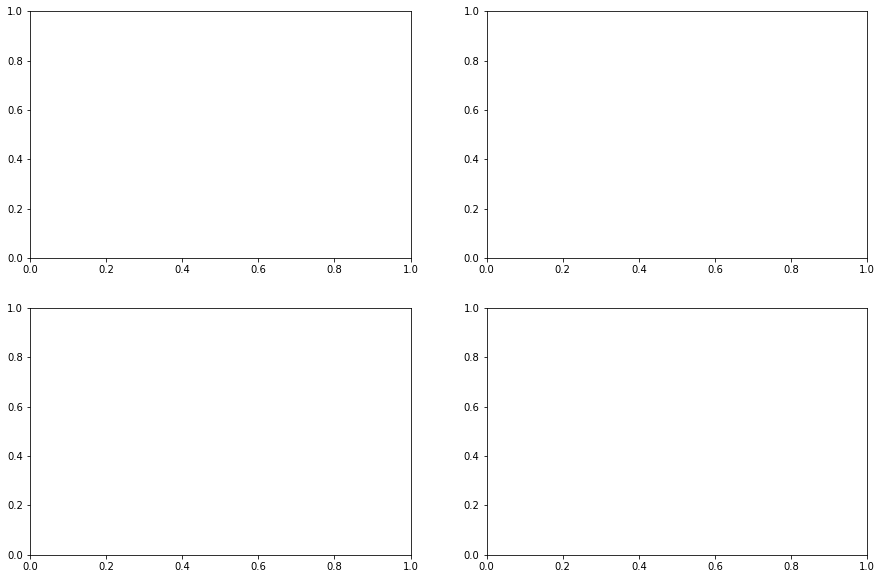

In [14]:
fig, axs = plt.subplots(2,2,figsize=(15,10))
axs[0, 0].plot(train_losses)
axs[0, 0].set_title("Training Loss")
axs[1, 0].plot(train_acc)
axs[1, 0].set_title("Training Accuracy")
axs[0, 1].plot(test_losses)
axs[0, 1].set_title("Test Loss")
axs[1, 1].plot(test_acc)
axs[1, 1].set_title("Test Accuracy")

In [ ]:
fig, axs = plt.subplots(2,2,figsize=(15,10))
axs[0, 0].plot(train_losses)
axs[0, 0].set_title("Training Loss")
axs[1, 0].plot(train_acc)
axs[1, 0].set_title("Training Accuracy")
axs[0, 1].plot(test_losses)
axs[0, 1].set_title("Test Loss")
axs[1, 1].plot(test_acc)
axs[1, 1].set_title("Test Accuracy")

In [ ]:
model = Net().to(device)
summary(model, input_size=(1, 28, 28))